In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft

%matplotlib widget

fs, sinal = wavfile.read('./ALS/Pathology/008.wav')


/var/folders/7h/0531s09j3m319qxy3xrn3nt00000gn/T/ipykernel_75640/2054885717.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, sinal = wavfile.read('./ALS/Pathology/008.wav')


 explicar porque estou a fazer este processamento

In [2]:
# 3 simples 44100 - 1 | x - 0.03
janelaAnalise = 1323
# regra de 3 simples 44100 - 1 | x - 0.01
arrasto = 441 


indice = 0 
incremento = 0
arrayJanelas = []

while len(sinal) - indice >= arrasto:
    intervalor = sinal[indice: indice + janelaAnalise]
    arrayJanelas.append(np.array(intervalor))
    incremento += 1
    indice += arrasto

import numpy.typing as npt

def getWindows(signal: npt.ArrayLike , frameSize: int, stepSize: int ) -> npt.ArrayLike :
    '''
    Funtion that creates a 2d array of frames, each frame with len of FrameSize
    and step of stepSize
    '''
    signal_frames = []

    step = 0

    while signal.size - step >= stepSize:
        signal_frames.append(signal[step: step + frameSize])
        step += stepSize

    return np.array(signal_frames)




arrayJanelas2 = getWindows(sinal, janelaAnalise, arrasto)

print(len(arrayJanelas))
print(len(arrayJanelas2))



589
589


/var/folders/7h/0531s09j3m319qxy3xrn3nt00000gn/T/ipykernel_75640/3386153903.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(signal_frames)


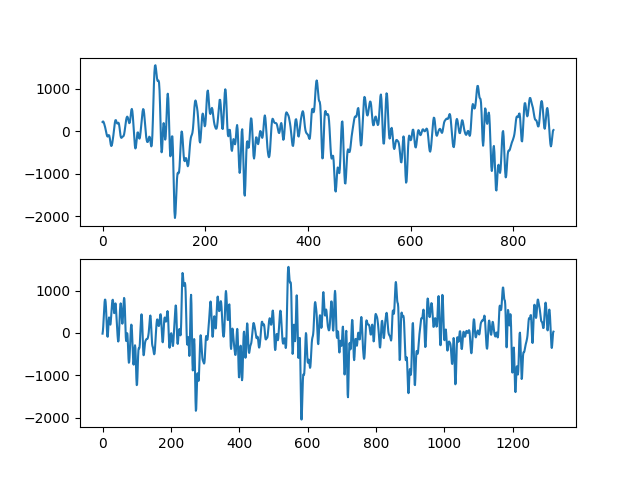

589


In [3]:
#subplot both array janelas and arrayJanelas2
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(arrayJanelas[588])
ax2.plot(arrayJanelas2[587])




plt.show()

print(len(arrayJanelas))


max_freq_index:  419
max_freq_index2:  1259
max_freq_index3:  2100
4511.2060546875 109.44289357715672 13555.1513671875 63.06653388952978 21490.13671875 63.23933612668631


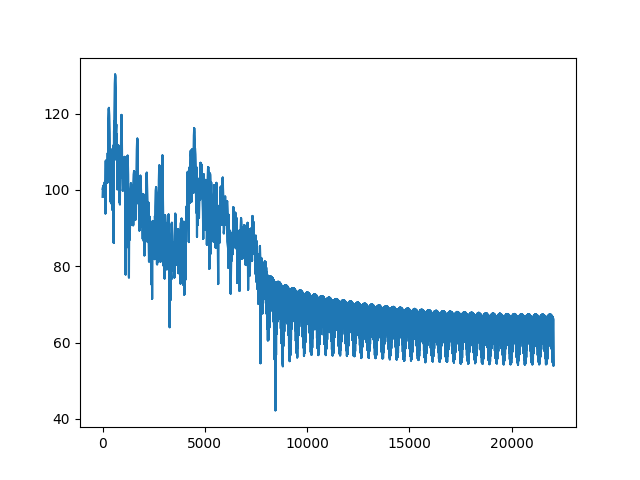

In [7]:
from scipy.fft import fftfreq

janelaTeste = arrayJanelas[0]

# n = numero de pontos que quero do fft
fftSimples = fft(janelaTeste, n=4096)

fft_frequencies = fftfreq(n=4096, d=1/fs)
fft_frequencies = abs(fft_frequencies)

fft_magnitude = 20 * np.log10(abs(fftSimples))


# ------------------------------ next step ------------------------------ #

#get index and value of max value in fft_frequencies in the intervals [0, 420], [421, 1260] and [2100, 5880]

max_freq_index = np.argmax(fft_frequencies[0:420])
max_freq_index2 = np.argmax(fft_frequencies[421:1260]) + 421
max_freq_index3 = np.argmax(fft_frequencies[2100:5880]) + 2100

print("max_freq_index: ", max_freq_index)
print("max_freq_index2: ", max_freq_index2)
print("max_freq_index3: ", max_freq_index3)


fbme_x = fft_frequencies[max_freq_index]
fbme_y = fft_magnitude[max_freq_index]

sbme_x = fft_frequencies[max_freq_index2]
sbme_y = fft_magnitude[max_freq_index2]

tbme_x = fft_frequencies[max_freq_index3]
tbme_y = fft_magnitude[max_freq_index3]


# ------------------------------ next step ------------------------------ #

#calculate decline between 3 points

lbst = (sbme_y - fbme_y) / (sbme_x - fbme_x)
hbst = (tbme_y- sbme_y) / (tbme_x - sbme_x)


#print values 
print(fbme_x, fbme_y, sbme_x, sbme_y, tbme_x, tbme_y)


""" plt.figure()

plt.plot(fft_frequencies, fft_magnitude)
plt.xlim(0, 8000)

plt.scatter(fbme_x, fbme_y,color="red")
plt.scatter(sbme_x, sbme_y, color="pink")
plt.scatter(tbme_x, tbme_y, color="green")

#plot decline 
plt.plot([fbme_x, sbme_x], [fbme_y, sbme_y], 'r')
plt.plot([sbme_x, tbme_x], [sbme_y, tbme_y], 'r')
plt.show()"""

plt.figure()




[ 0.         10.76660156 21.53320312 ... 32.29980469 21.53320312
 10.76660156]
max_freq_index:  57
max_freq_index2:  421
max_freq_index3:  4039


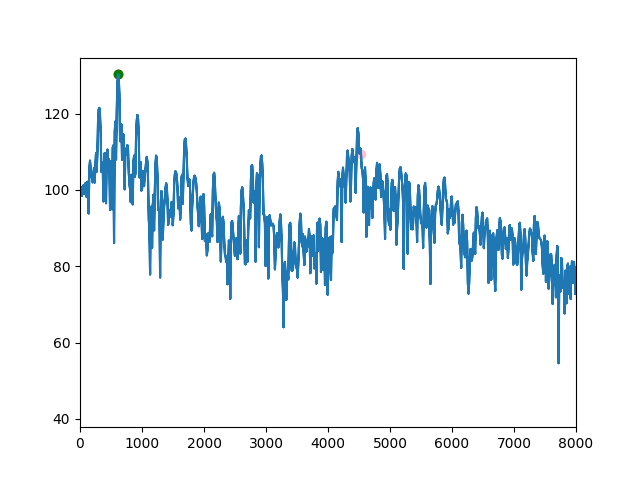

max_freq_index:  29
max_freq_index2:  57
max_freq_index3:  416


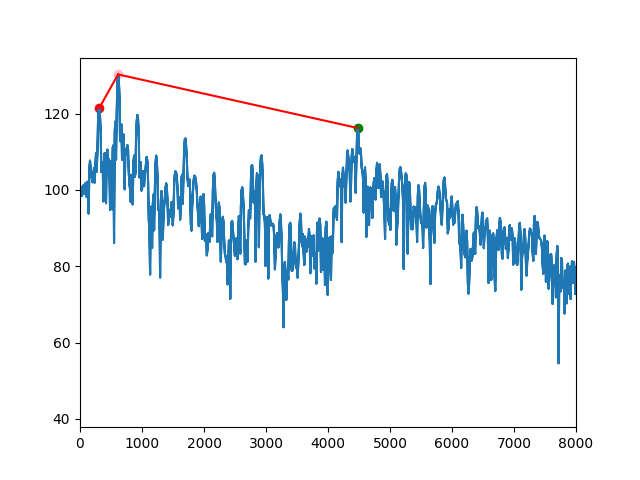

In [5]:
from scipy.fft import fftfreq

janelaTeste = arrayJanelas[0]

# n = numero de pontos que quero do fft
fftSimples = fft(janelaTeste, n=4096)

fft_frequencies = fftfreq(n=4096, d=1/fs)
fft_frequencies = abs(fft_frequencies)

fft_magnitude = 20 * np.log10(abs(fftSimples))


def getBandPoints(frequencies, magnitudes):
    fbme_x = 0
    fbme_y = 0

    sbme_x = 0
    sbme_y = 0

    tbme_x = 0
    tbme_y = 0

    for i in range(len(frequencies)):

        currentFrequency = frequencies[i]
        currentMagnitude = magnitudes[i]
        
        if currentFrequency >= 0 and currentFrequency <= 420:
            if currentMagnitude > fbme_y:
                fbme_x = currentFrequency
                fbme_y = currentMagnitude
            
        elif currentFrequency >= 421 and currentFrequency <= 1260:
            if currentMagnitude > sbme_y:
                sbme_x = currentFrequency
                sbme_y = currentMagnitude

        elif currentFrequency >= 2100 and currentFrequency <= 5880:
            if currentMagnitude > tbme_y:
                tbme_x = currentFrequency
                tbme_y = currentMagnitude
    
    return {"fbme": {"x": fbme_x, "y": fbme_y}, 
        "sbme": {"x": sbme_x, "y": sbme_y}, 
        "tbme": {"x": tbme_x, "y": tbme_y}}


# ------------------------------ next step ------------------------------ #

#calculate decline between 3 points

lbst = (sbme_y - fbme_y) / (sbme_x - fbme_x)
hbst = (tbme_y- sbme_y) / (tbme_x - sbme_x)



plt.figure()

plt.plot(fft_frequencies, fft_magnitude)
plt.xlim(0, 8000)

plt.scatter(fbme_x, fbme_y,color="red")
plt.scatter(sbme_x, sbme_y, color="pink")
plt.scatter(tbme_x, tbme_y, color="green")

#plot decline 
plt.show()

def ObterPontosMaximos(freqs, mags):
    FBME_x = -1 * np.inf
    FBME_y = -1 * np.inf
    SBME_x = -1 * np.inf
    SBME_y = -1 * np.inf
    TBME_x = -1 * np.inf
    TBME_y = -1 * np.inf

    for i in range(len(freqs)):
        freq = freqs[i]
        magnitude = mags[i]
        # FBME (First Band Maximum Energy) [0 - 420] Hz
        if (freq >= 0 and freq <= 420):
            if (magnitude > FBME_y):
                max_freq_index = i
                FBME_y = magnitude
                FBME_x = freq

        # SBME (Second Band Maximum Energy) ]420 - 1260]
        elif (freq > 420 and freq <= 1260):
            if (magnitude > SBME_y):
                max_freq_index2 = i
                SBME_y = magnitude
                SBME_x = freq

        # TBME (Third Band Maximum Energy)  [2100 - 5880]
        elif (freq >= 2100 and freq <= 5880):
            if (magnitude > TBME_y):
                max_freq_index3 = i
                TBME_y = magnitude
                TBME_x = freq

    print("max_freq_index: ", max_freq_index)
    print("max_freq_index2: ", max_freq_index2)
    print("max_freq_index3: ", max_freq_index3)
    
    return FBME_x, FBME_y, SBME_x, SBME_y, TBME_x, TBME_y

fbme_x, fbme_y, sbme_x, sbme_y, tbme_x, tbme_y = ObterPontosMaximos(fft_frequencies, fft_magnitude)


# ------------------------------ next step ------------------------------ #

#calculate decline between 3 points

lbst = (sbme_y - fbme_y) / (sbme_x - fbme_x)
hbst = (tbme_y- sbme_y) / (tbme_x - sbme_x)


#print valu

""" 
plt.figure()

plt.plot(fft_frequencies, fft_magnitude)
plt.xlim(0, 8000)

plt.scatter(fbme_x, fbme_y,color="red")
plt.scatter(sbme_x, sbme_y, color="pink")
plt.scatter(tbme_x, tbme_y, color="green")

#plot decline 
plt.plot([fbme_x, sbme_x], [fbme_y, sbme_y], 'r')
plt.plot([sbme_x, tbme_x], [sbme_y, tbme_y], 'r')
plt.show()
"""



plt.figure()

plt.plot(fft_frequencies, fft_magnitude)
plt.xlim(0, 8000)

plt.scatter(fbme_x, fbme_y,color="red")
plt.scatter(sbme_x, sbme_y, color="pink")
plt.scatter(tbme_x, tbme_y, color="green")

#plot decline 
plt.plot([fbme_x, sbme_x], [fbme_y, sbme_y], 'r')
plt.plot([sbme_x, tbme_x], [sbme_y, tbme_y], 'r')
plt.show()

